In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import re

In [2]:
def load_data():
  data = pd.read_excel('/content/Data Skripsi fix.xlsx')

  return data

In [3]:
tweet_df = load_data()

In [4]:
tweet_df.head()

,created_at,full_text,username,Kategori
0,Tue Oct 03 01:22:55 +0000 2023,Timnas Indonesia U-17 yang dipersiapkan untuk ...,heralddotID,Netral
1,Tue Oct 03 00:57:07 +0000 2023,"Apa cuma gue yg baru tau, segitu concernnya Pa...",NayDonuts,Positif
2,Mon Oct 02 23:31:06 +0000 2023,Tiket Piala Dunia U-17 di Indonesia Cuma Rp75 ...,VIVAbola,Netral
3,Mon Oct 02 21:53:15 +0000 2023,"Sambut Piala Dunia U-17, Badak Sumatera Lahir ...",kabarlhk,Netral
4,Mon Oct 02 18:30:38 +0000 2023,Pemkot Surabaya Dampingi Panitia Lokal Piala D...,thejatimcom,Netral


In [6]:
df = pd.DataFrame(tweet_df[['full_text', 'Kategori']])

In [7]:
df.shape

(2044, 2)

In [8]:
df['lower'] = df['full_text'].str.lower()
df.head()

,full_text,Kategori,lower
0,Timnas Indonesia U-17 yang dipersiapkan untuk ...,Netral,timnas indonesia u-17 yang dipersiapkan untuk ...
1,"Apa cuma gue yg baru tau, segitu concernnya Pa...",Positif,"apa cuma gue yg baru tau, segitu concernnya pa..."
2,Tiket Piala Dunia U-17 di Indonesia Cuma Rp75 ...,Netral,tiket piala dunia u-17 di indonesia cuma rp75 ...
3,"Sambut Piala Dunia U-17, Badak Sumatera Lahir ...",Netral,"sambut piala dunia u-17, badak sumatera lahir ..."
4,Pemkot Surabaya Dampingi Panitia Lokal Piala D...,Netral,pemkot surabaya dampingi panitia lokal piala d...


In [9]:
import re # impor modul regular expression

# PROSES TEXT CLEANING

def hapus_angka(tweet):
  tweet = re.sub(r"\d+", "", tweet)
  # remove old style retweet text "RT"
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  # remove hyperlinks
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
  # remove hashtags
  # only removing the hash # sign from the word
  tweet = re.sub(r'#+', '', tweet)
  #remove mentions
  tweet = re.sub(r'@\w+', '', tweet)
  #remove coma
  tweet = re.sub(r',','',tweet)
  #remove angka
  tweet = re.sub('[0-9]+', '', tweet)
  #Aphabets only, exlude numbers and special characters
  tweet = re.sub(r'[^a-zA-Z]+', ' ', tweet)

  return tweet

In [10]:
df['h_angka']=df['lower'].apply(lambda x: hapus_angka(x))

In [11]:
df.head()

,full_text,Kategori,lower,h_angka
0,Timnas Indonesia U-17 yang dipersiapkan untuk ...,Netral,timnas indonesia u-17 yang dipersiapkan untuk ...,timnas indonesia u yang dipersiapkan untuk pia...
1,"Apa cuma gue yg baru tau, segitu concernnya Pa...",Positif,"apa cuma gue yg baru tau, segitu concernnya pa...",apa cuma gue yg baru tau segitu concernnya pak...
2,Tiket Piala Dunia U-17 di Indonesia Cuma Rp75 ...,Netral,tiket piala dunia u-17 di indonesia cuma rp75 ...,tiket piala dunia u di indonesia cuma rp ribu ...
3,"Sambut Piala Dunia U-17, Badak Sumatera Lahir ...",Netral,"sambut piala dunia u-17, badak sumatera lahir ...",sambut piala dunia u badak sumatera lahir dari...
4,Pemkot Surabaya Dampingi Panitia Lokal Piala D...,Netral,pemkot surabaya dampingi panitia lokal piala d...,pemkot surabaya dampingi panitia lokal piala d...


In [12]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


In [13]:
from nltk.tokenize import TweetTokenizer
import re

# TOKENISASI

def fulltext(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags (only removing the hash # sign from the word)
    tweet = re.sub(r'#', '', tweet)
    # remove commas
    tweet = re.sub(r',', '', tweet)
    # remove numbers
    tweet = re.sub('[0-9]+', '', tweet)

    # Tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    return tweet_tokens

df['tokenizing'] = df['h_angka'].apply(lambda x: fulltext(x))


In [14]:
df.head()

,full_text,Kategori,lower,h_angka,tokenizing
0,Timnas Indonesia U-17 yang dipersiapkan untuk ...,Netral,timnas indonesia u-17 yang dipersiapkan untuk ...,timnas indonesia u yang dipersiapkan untuk pia...,"[timnas, indonesia, u, yang, dipersiapkan, unt..."
1,"Apa cuma gue yg baru tau, segitu concernnya Pa...",Positif,"apa cuma gue yg baru tau, segitu concernnya pa...",apa cuma gue yg baru tau segitu concernnya pak...,"[apa, cuma, gue, yg, baru, tau, segitu, concer..."
2,Tiket Piala Dunia U-17 di Indonesia Cuma Rp75 ...,Netral,tiket piala dunia u-17 di indonesia cuma rp75 ...,tiket piala dunia u di indonesia cuma rp ribu ...,"[tiket, piala, dunia, u, di, indonesia, cuma, ..."
3,"Sambut Piala Dunia U-17, Badak Sumatera Lahir ...",Netral,"sambut piala dunia u-17, badak sumatera lahir ...",sambut piala dunia u badak sumatera lahir dari...,"[sambut, piala, dunia, u, badak, sumatera, lah..."
4,Pemkot Surabaya Dampingi Panitia Lokal Piala D...,Netral,pemkot surabaya dampingi panitia lokal piala d...,pemkot surabaya dampingi panitia lokal piala d...,"[pemkot, surabaya, dampingi, panitia, lokal, p..."


In [15]:
#tambahan
import re

# PROSES FILTERING ATAU STOPWORDS REMOMVAL

sw = []
def stopwords(text):
    '''a function for removing the stopword'''
    filtered_words = []

    for word in text:
        if word not in sw:
            filtered_words.append(word)

    # Gabungkan kembali kata-kata yang tidak dihapus
    text = " ".join(filtered_words)

    # Hindari penggunaan regex untuk penghapusan duplikasi yang berlebihan
    # Kode regex dihilangkan untuk menghindari kehilangan informasi kata seperti 'lolos' dan 'lulus'

    return text

df['filtering'] = df['tokenizing'].apply(stopwords)
df['filtering']


,filtering
0,timnas indonesia u yang dipersiapkan untuk pia...
1,apa cuma gue yg baru tau segitu concernnya pak...
2,tiket piala dunia u di indonesia cuma rp ribu ...
3,sambut piala dunia u badak sumatera lahir dari...
4,pemkot surabaya dampingi panitia lokal piala d...
...,...
2039,penjualan tiket habis kapolda jateng himbau pe...
2040,personel pengamanan tergelar lengkap kapolda j...
2041,kapolda jateng apresiasi tni polri dalam penga...
2042,piala dunia u fifa jadwal pertandingan final s...


In [16]:
df.head()

,full_text,Kategori,lower,h_angka,tokenizing,filtering
0,Timnas Indonesia U-17 yang dipersiapkan untuk ...,Netral,timnas indonesia u-17 yang dipersiapkan untuk ...,timnas indonesia u yang dipersiapkan untuk pia...,"[timnas, indonesia, u, yang, dipersiapkan, unt...",timnas indonesia u yang dipersiapkan untuk pia...
1,"Apa cuma gue yg baru tau, segitu concernnya Pa...",Positif,"apa cuma gue yg baru tau, segitu concernnya pa...",apa cuma gue yg baru tau segitu concernnya pak...,"[apa, cuma, gue, yg, baru, tau, segitu, concer...",apa cuma gue yg baru tau segitu concernnya pak...
2,Tiket Piala Dunia U-17 di Indonesia Cuma Rp75 ...,Netral,tiket piala dunia u-17 di indonesia cuma rp75 ...,tiket piala dunia u di indonesia cuma rp ribu ...,"[tiket, piala, dunia, u, di, indonesia, cuma, ...",tiket piala dunia u di indonesia cuma rp ribu ...
3,"Sambut Piala Dunia U-17, Badak Sumatera Lahir ...",Netral,"sambut piala dunia u-17, badak sumatera lahir ...",sambut piala dunia u badak sumatera lahir dari...,"[sambut, piala, dunia, u, badak, sumatera, lah...",sambut piala dunia u badak sumatera lahir dari...
4,Pemkot Surabaya Dampingi Panitia Lokal Piala D...,Netral,pemkot surabaya dampingi panitia lokal piala d...,pemkot surabaya dampingi panitia lokal piala d...,"[pemkot, surabaya, dampingi, panitia, lokal, p...",pemkot surabaya dampingi panitia lokal piala d...


In [17]:
#tambahan
import re

# NORMALISASI

# Kamus singkatan dan kata baku
singkatan_kamus = {
    'gk': 'tidak',
    'tdk': 'tidak',
    'gak': 'tidak',
    'tp': 'tapi',
    'ajh' : 'saja',
    'utk' : 'untuk',
    'gmn' : 'gimana',
    'drpd' : 'dari pada',
    'srt' : 'serta',
    'utk' : 'untuk',
    'pd' : 'pada',
    'yg': 'yang',
    'aja': 'saja',
    'btw': 'omong-omong',
    'kpd': 'kepada',
    'dgn': 'dengan',
    'dll': 'dan lain-lain',
    'klo': 'kalau',
    'bbrp': 'beberapa',
    'wkwk': 'tertawa',
    'haha': 'tertawa',
    'huhu': 'sedih',
    'plis': 'tolong',
    'tp': 'tapi',
    'gmana': 'bagaimana',
    'nggak': 'tidak',
    'gabut': 'bosan',
    'ngapain': 'melakukan apa',
    'mantul': 'mantap betul',
    'pfft': 'meremehkan',
    'lol': 'tertawa terbahak-bahak',
    'baper': 'terbawa perasaan',
    'lebay': 'berlebihan',
    'alay': 'berlebihan dalam penampilan atau tingkah laku',
    'kepo': 'ingin tahu banyak',
    'cmiiw': 'koreksi jika saya salah',
    'omdo': 'omong doang',
    'gaje': 'tidak jelas',
    'gws': 'semoga cepat sembuh',
    'php': 'pemberi harapan palsu',
    'woles': 'santai',
    'mager': 'malas gerak',
    'jgn': 'jangan',
    'sdh': 'sudah',
    'lolos': 'lulus',
    'dki': 'jakarta'
    # Anda bisa menambahkan lebih banyak singkatan jika diperlukan
}

def replace_singkatan(tweet):
    words = tweet.split()
    replaced_words = []
    for word in words:
        # Cek apakah kata ada dalam kamus singkatan
        word_lower = word.lower()
        if word_lower in singkatan_kamus:
            # Ganti dengan kata baku dari kamus
            replaced_words.append(singkatan_kamus[word_lower])
        else:
            replaced_words.append(word)
    return " ".join(replaced_words)

# Contoh penggunaan dalam DataFrame
df['tweet_clean'] = df['filtering'].apply(replace_singkatan)
df['tweet_clean']


,tweet_clean
0,timnas indonesia u yang dipersiapkan untuk pia...
1,apa cuma gue yang baru tau segitu concernnya p...
2,tiket piala dunia u di indonesia cuma rp ribu ...
3,sambut piala dunia u badak sumatera lahir dari...
4,pemkot surabaya dampingi panitia lokal piala d...
...,...
2039,penjualan tiket habis kapolda jateng himbau pe...
2040,personel pengamanan tergelar lengkap kapolda j...
2041,kapolda jateng apresiasi tni polri dalam penga...
2042,piala dunia u fifa jadwal pertandingan final s...


In [18]:
# file path: stopwords_removal_id.py

# STOPWORDS REMOVAL DAN FILTERING

def remove_stopwords(text):
    # Daftar stopwords umum dalam bahasa Indonesia
    stopwords = set([
        'yang', 'dan', 'di', 'ke', 'dari', 'untuk', 'pada', 'adalah', 'dengan', 'sebagai', 'bahwa',
        'oleh', 'dalam', 'itu', 'ini', 'untuk', 'dengan', 'dari', 'juga', 'akan', 'tidak', 'ada',
        'karena', 'jadi', 'atau', 'hanya', 'saja', 'kita', 'mereka', 'sudah', 'belum', 'bisa',
        'kalau', 'lagi', 'tetapi', 'masih', 'sesudah', 'harus', 'sehingga', 'demi', 'pun', 'bagi',
        'hingga', 'sebelum', 'ketika', 'saat', 'sejak', 'sebuah', 'seperti', 'antara', 'banyak',
        'lebih', 'daripada', 'terhadap', 'melalui', 'namun', 'sampai', 'jika', 'malah', 'bahkan',
        'sedang', 'apakah', 'semua', 'lagi', 'mengapa', 'tidak', 'setelah', 'tanpa', 'cukup',
        'hampir', 'maka', 'agar', 'sekitar', 'apapun', 'adanya', 'sedikit', 'bukan', 'bagaimana',
        'berapa', 'sebelumnya', 'tentu', 'kami', 'kenapa', 'biar', 'kenapa', 'dengan', 'sering',
        'maupun', 'tetapi', 'tetap', 'demikian', 'serta', 'oleh', 'setiap', 'paling', 'antara',
        'amp', 'ga', 'gak', 'ya', 'nya', 'aja', 'gt', 'ken', 'kan', 'dah', 'ev', 'tak', 'kok',
        'innovacommunity', 'radioelshinta', 'lah', 'tau', 'jd', 'bla', 'jg', 'ken', 'om', 'ex',
        'tapi', 'apa', 'mau', 'udah', 'kalo', 'lain', 'dulu', 'masa', 'dia', 'yah', 'cek', 'ngga',
        'buat'
    ])

    # Memisahkan teks menjadi kata-kata individual
    words = text.split()

    # Menghapus kata-kata yang ada dalam daftar stopwords
    filtered_words = [word for word in words if word.lower() not in stopwords]

    # Menggabungkan kembali kata-kata yang tersisa menjadi sebuah string
    filtered_text = ' '.join(filtered_words)
    return filtered_text

# Contoh penggunaan fungsi
text = "Ini adalah contoh sederhana untuk mendemonstrasikan bagaimana fungsi bekerja."
clean_text = remove_stopwords(text)
print(clean_text)

df['stopwords'] = df['tweet_clean'].apply(lambda x: remove_stopwords(x)) # Apply the renamed function

contoh sederhana mendemonstrasikan fungsi bekerja.


In [19]:
#tambahan
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# STEMMING

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Daftar kata-kata yang tidak ingin di-stem
stopwords_list = [ 'lolos', 'lulus']  # Tambahkan kata-kata lain sesuai kebutuhan

def stemming(tweet):
    words = tweet.split()
    stemmed_words = []
    for word in words:
        if word.lower() in stopwords_list:
            stemmed_words.append(word)  # Tetap mempertahankan kata yang ada dalam daftar pengecualian
        else:
            stemmed_words.append(stemmer.stem(word))
    return " ".join(stemmed_words)

df['bersih'] = df['stopwords'].apply(stemming)
df['bersih']


,bersih
0,timnas indonesia u siap piala dunia raih menan...
1,cuma gue baru segitu concernnya pak sama perse...
2,tiket piala dunia u indonesia cuma rp ribu car...
3,sambut piala dunia u badak sumatera lahir pasa...
4,pemkot surabaya damping panitia lokal piala du...
...,...
2039,jual tiket habis kapolda jateng himbau tonton ...
2040,personel aman gelar lengkap kapolda jateng opt...
2041,kapolda jateng apresiasi tni polri aman piala ...
2042,piala dunia u fifa jadwal tanding final sabtu ...


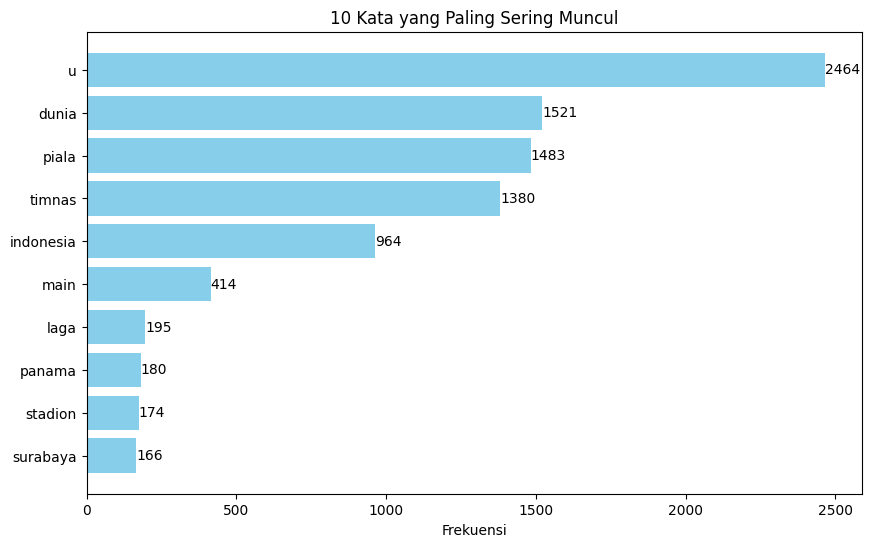

In [20]:
#Menggunakan Matplotlib untuk Bar Chart (tambahan)
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Misalnya kolom 'tweet_clean' sudah berisi teks yang diproses
all_words = ' '.join(df['bersih']).split()
word_freq = Counter(all_words)

# Mengambil 20 kata yang paling sering muncul
most_common_words = word_freq.most_common(10)

# Memisahkan kata dan frekuensi untuk visualisasi
words, counts = zip(*most_common_words)

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color='skyblue')
plt.xlabel('Frekuensi')
plt.title('10 Kata yang Paling Sering Muncul')
plt.gca().invert_yaxis()  # Membalik urutan kata agar kata yang paling sering muncul di atas
for i, v in enumerate(counts):
    plt.text(v + 0.1, i, str(v), color='black', va='center', ha='left')
plt.show()

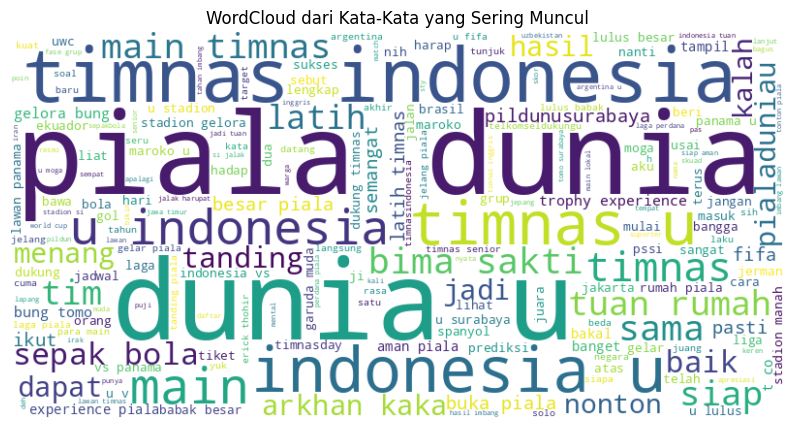

In [21]:
#Menggunakan WordCloud untuk Visualisasi Kata (tambahan)
from wordcloud import WordCloud

# Gabungkan semua kata dalam kolom 'tweet_clean'
text = ' '.join(df['bersih'])

# Buat WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Visualisasi WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud dari Kata-Kata yang Sering Muncul')
plt.show()


In [22]:
df.head()

,full_text,Kategori,lower,h_angka,tokenizing,filtering,tweet_clean,stopwords,bersih
0,Timnas Indonesia U-17 yang dipersiapkan untuk ...,Netral,timnas indonesia u-17 yang dipersiapkan untuk ...,timnas indonesia u yang dipersiapkan untuk pia...,"[timnas, indonesia, u, yang, dipersiapkan, unt...",timnas indonesia u yang dipersiapkan untuk pia...,timnas indonesia u yang dipersiapkan untuk pia...,timnas indonesia u dipersiapkan piala dunia me...,timnas indonesia u siap piala dunia raih menan...
1,"Apa cuma gue yg baru tau, segitu concernnya Pa...",Positif,"apa cuma gue yg baru tau, segitu concernnya pa...",apa cuma gue yg baru tau segitu concernnya pak...,"[apa, cuma, gue, yg, baru, tau, segitu, concer...",apa cuma gue yg baru tau segitu concernnya pak...,apa cuma gue yang baru tau segitu concernnya p...,cuma gue baru segitu concernnya pak sama perse...,cuma gue baru segitu concernnya pak sama perse...
2,Tiket Piala Dunia U-17 di Indonesia Cuma Rp75 ...,Netral,tiket piala dunia u-17 di indonesia cuma rp75 ...,tiket piala dunia u di indonesia cuma rp ribu ...,"[tiket, piala, dunia, u, di, indonesia, cuma, ...",tiket piala dunia u di indonesia cuma rp ribu ...,tiket piala dunia u di indonesia cuma rp ribu ...,tiket piala dunia u indonesia cuma rp ribu car...,tiket piala dunia u indonesia cuma rp ribu car...
3,"Sambut Piala Dunia U-17, Badak Sumatera Lahir ...",Netral,"sambut piala dunia u-17, badak sumatera lahir ...",sambut piala dunia u badak sumatera lahir dari...,"[sambut, piala, dunia, u, badak, sumatera, lah...",sambut piala dunia u badak sumatera lahir dari...,sambut piala dunia u badak sumatera lahir dari...,sambut piala dunia u badak sumatera lahir pasa...,sambut piala dunia u badak sumatera lahir pasa...
4,Pemkot Surabaya Dampingi Panitia Lokal Piala D...,Netral,pemkot surabaya dampingi panitia lokal piala d...,pemkot surabaya dampingi panitia lokal piala d...,"[pemkot, surabaya, dampingi, panitia, lokal, p...",pemkot surabaya dampingi panitia lokal piala d...,pemkot surabaya dampingi panitia lokal piala d...,pemkot surabaya dampingi panitia lokal piala d...,pemkot surabaya damping panitia lokal piala du...


In [23]:
df.to_excel('dataujibersihfix.xlsx', index=False)